Seaborn plots exploration




In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Relational Plots
These plots show relationships between two or more variables.
- scatterplot: *sns.scatterplot()*

relplot: A figure-level function for creating scatter and line plots.

In [3]:
movies = pd.read_csv('/home/annie/Python/data/MoviesOnStreamingPlatforms.csv')
movies.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


In [5]:
movie_ratings_df = movies.copy().drop(columns=['Unnamed: 0', 'ID'])
movie_ratings_df['ratings'] = movie_ratings_df['Rotten Tomatoes'].str.replace('/100', '').fillna('0').astype(int)
movie_ratings_df.head()
# movie_ratings_df[movie_ratings_df['ratings'] == '0']

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,ratings
0,The Irishman,2019,18+,98/100,1,0,0,0,0,98
1,Dangal,2016,7+,97/100,1,0,0,0,0,97
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,95
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0,94
4,Roma,2018,18+,94/100,1,0,0,0,0,94


In [6]:
# movie_ratings_df.info()

In [7]:
disney_df = movie_ratings_df.copy().drop(columns=['Netflix', 'Hulu', 'Prime Video'])
disney_df = disney_df[disney_df['Disney+'] == 1] 

In [8]:
disney_df.head()

,Title,Year,Age,Rotten Tomatoes,Disney+,Type,ratings
270,White Fang,2018,7+,76/100,1,0,76
712,Muppets Most Wanted,2014,7+,67/100,1,0,67
1330,Zapped,2014,all,59/100,1,0,59
1813,The Blue Umbrella,2005,NaN,54/100,1,0,54
2029,Sky High,2020,NaN,51/100,1,0,51


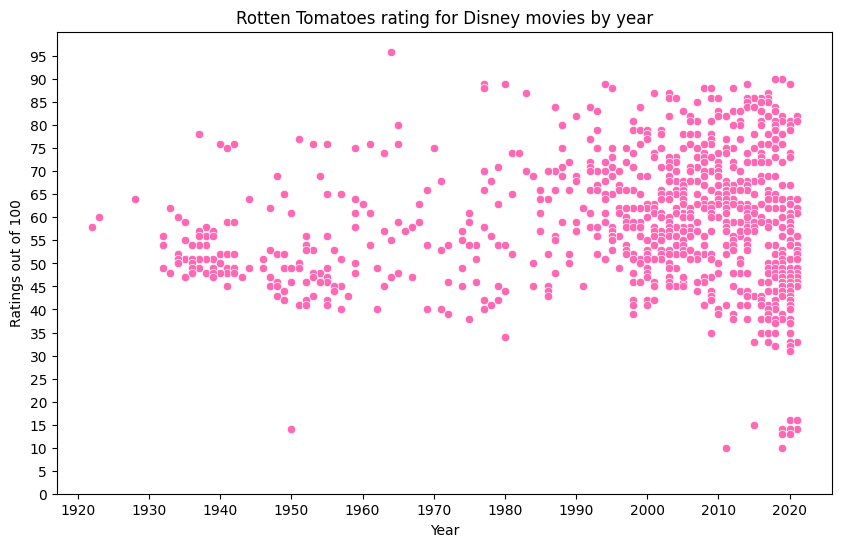

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', 
                y='ratings', 
                color='hotpink',
                data=disney_df)
plt.title('Rotten Tomatoes rating for Disney movies by year')
plt.ylabel('Ratings out of 100')
plt.yticks(ticks=range(0,100,5))
plt.xticks(ticks=range(1920, 2024, 10))

#using regplot to add a regression line

# sns.regplot(x='Year', 
#             y='ratings', 
#             data=disney_df,
#             scatter=False, # Disable scatter points to avoid duplicate points
#             color='skyblue')
# plt.ylabel('Ratings out of 100')
# plt.yticks(ticks=range(0,100,5))
plt.show()

In [10]:
disney_df[disney_df['ratings']<20].sort_values(by='Year', ascending=False)

,Title,Year,Age,Rotten Tomatoes,Disney+,Type,ratings
9503,Disney My Music Story: Sukima Switch,2021,16+,16/100,1,0,16
9509,Built for Mars: The Perseverance Rover,2021,NaN,14/100,1,0,14
9502,Sharkcano,2020,NaN,16/100,1,0,16
9507,Texas Storm Squad,2020,13+,14/100,1,0,14
9508,What the Shark?,2020,13+,14/100,1,0,14
9510,Most Wanted Sharks,2020,NaN,14/100,1,0,14
9511,Doc McStuffins: The Doc Is In,2020,NaN,13/100,1,0,13
9505,Great Shark Chow Down,2019,7+,14/100,1,0,14
9512,Ultimate Viking Sword,2019,NaN,13/100,1,0,13
9514,Women of Impact: Changing the World,2019,7+,10/100,1,0,10


#### Regression line
- trends --> visual representaion of the relationship between x and y
- can be used to predict future values
- summarises the overall direction and strength of the relationship
- identifies outliers

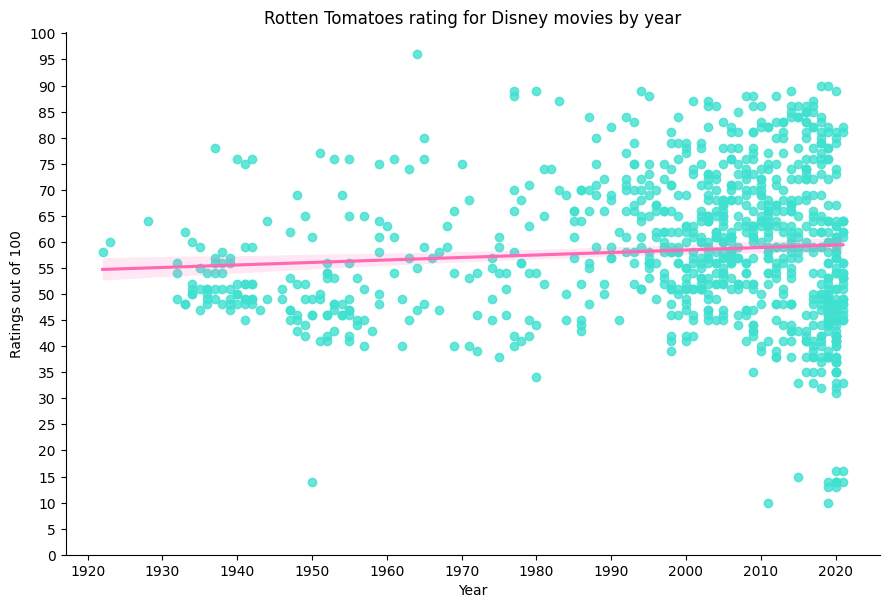

In [11]:
# Using sns.lmplot
sns.lmplot(x='Year', 
                y='ratings', 
                height=6,
                aspect=1.5,
                data=disney_df,
                scatter_kws={'color': 'turquoise'},
                line_kws={'color': 'hotpink'})  # Change the color of the regression line

plt.title('Rotten Tomatoes rating for Disney movies by year')
plt.ylabel('Ratings out of 100')
plt.yticks(ticks=range(0,105,5))
plt.xticks(ticks=range(1920, 2024, 10))
plt.show()

- Regression Line: represents the trend of the data. The shaded area around the line represents the confidence interval, indicating the uncertainty of the regression estimate.
- The regression line is relatively flat, suggesting that there is no strong trend in the ratings over time. This implies that the average Rotten Tomatoes rating for Disney movies has remained relatively stable over the decades.
- There is significant variability in the ratings, especially in recent years (from the 1990s onwards), indicating that Disney has released movies with both very high and very low ratings.
Earlier years (1930s to 1950s) show fewer movies, with a tendency towards lower ratings compared to later years.
- Recent Years: The dense clustering of data points in recent years indicates that Disney has released a higher number of movies. The ratings for these movies vary widely, but there is no clear upward or downward trend in average ratings.
- Flat Regression Line: The lack of a strong slope in the regression line suggests that, on average, Disney movies' Rotten Tomatoes ratings have not significantly improved or declined over time.
- High Variability: The wide spread of points indicates that Disney has produced a diverse range of movies, with some receiving very high ratings and others very low ratings, particularly in recent decades.

#### Categorical Plots
These plots are used to show the distribution of data across different categories.
- stripplot: *sns.stripplot()*
- swarmplot: *sns.swarmplot()*
- boxplot: *sns.boxplot()*
- boxenplot (an enhanced box plot): *sns.boxenplot()* 
- violinplot: *sns.violinplot()*

catplot: A figure-level function for creating categorical plots.

In [15]:
penguin_lter = pd.read_csv('/home/annie/Python/data/penguins_lter.csv')
penguin_df = penguin_lter.dropna(subset=['Sex']) #drop NaNs from Sex column
penguin_df = penguin_df.drop(columns=['Sample Number', 'Individual ID', 'Stage', 'Clutch Completion', 'Clutch Completion', 'Date Egg', 'Comments'])
penguin_df = penguin_df[penguin_df['Sex'] != '.']
penguin_df.head()


# penguin_df.info()

,studyName,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805


In [16]:
# penguin_lter['Clutch Completion'].unique()
# penguin_lter['studyName'].unique()
# penguin_lter['Date Egg'].unique()
# penguin_lter['Stage'].unique()

In [17]:
# penguin_clean[penguin_clean['Sex']=='.']
penguin_df.head()

,studyName,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805


In [18]:
penguin_df.sample(5)

,studyName,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
309,PAL0910,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,52.1,17.0,230.0,5550.0,MALE,8.27595,-26.11657
294,PAL0809,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,46.4,15.0,216.0,4700.0,FEMALE,8.47938,-26.95470
50,PAL0809,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,39.6,17.7,186.0,3500.0,FEMALE,8.46616,-26.12989
157,PAL0708,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
111,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,45.6,20.3,191.0,4600.0,MALE,8.65466,-26.32909


In [19]:
penguin_df['Sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

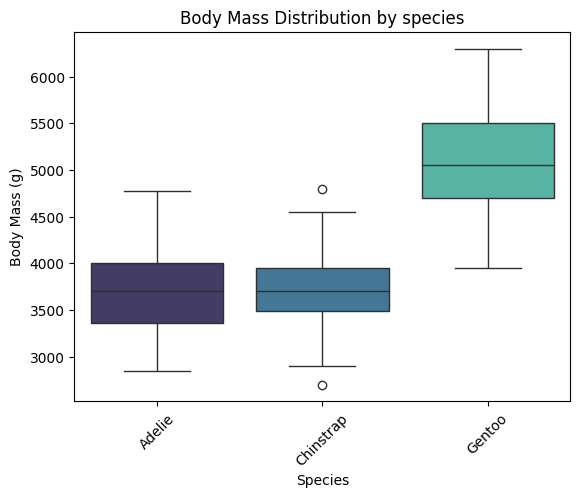

In [20]:
#penguin_df

sns.boxplot(data=penguin_df, x='Species', y='Body Mass (g)', palette='mako', hue='Species')
plt.xticks(rotation=45)  
plt.xticks(ticks=[0, 1, 2], labels=['Adelie', 'Chinstrap', 'Gentoo']) # rename ticker labels
plt.title('Body Mass Distribution by species')
plt.show()

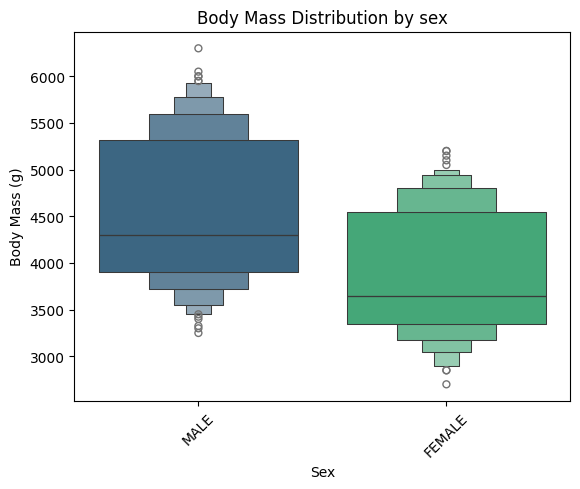

In [21]:
sns.boxenplot(data=penguin_df, x='Sex', y='Body Mass (g)', palette='viridis', hue='Sex')
plt.xticks(rotation=45)  
plt.title('Body Mass Distribution by sex')
plt.show()

In [22]:
# #disney_df
# sns.boxplot(x=disney_df['ratings'])
# plt.show()

# sns.boxenplot(x=disney_df['ratings'])
# plt.show()

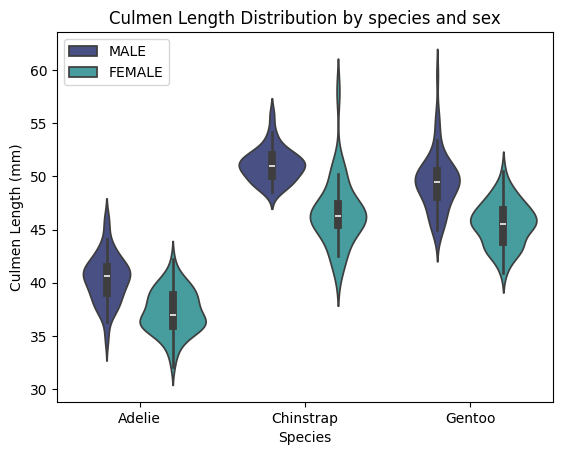

In [23]:
sns.violinplot(data=penguin_df, x='Species', y='Culmen Length (mm)', hue='Sex', palette='mako')
plt.xticks(ticks=[0, 1, 2], labels=['Adelie', 'Chinstrap', 'Gentoo']) # rename ticker labels
plt.legend(loc="upper left")
plt.title('Culmen Length Distribution by species and sex')
plt.show()

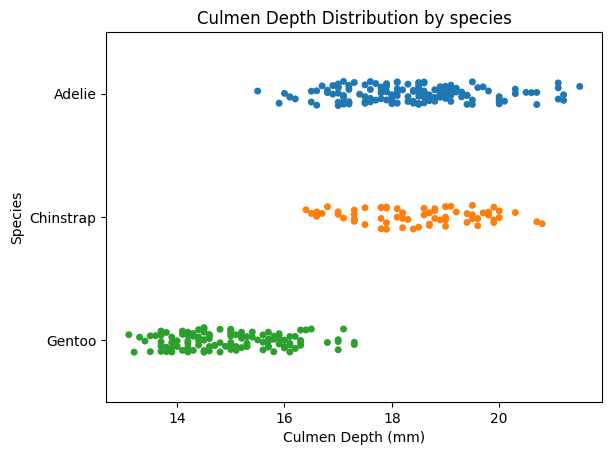

In [24]:
# sns.stripplot(x=disney_df['ratings'])
# plt.show()

sns.stripplot(x='Culmen Depth (mm)', y='Species', hue='Species', data=penguin_df)
plt.yticks(ticks=[0, 1, 2], labels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title('Culmen Depth Distribution by species')
plt.show()

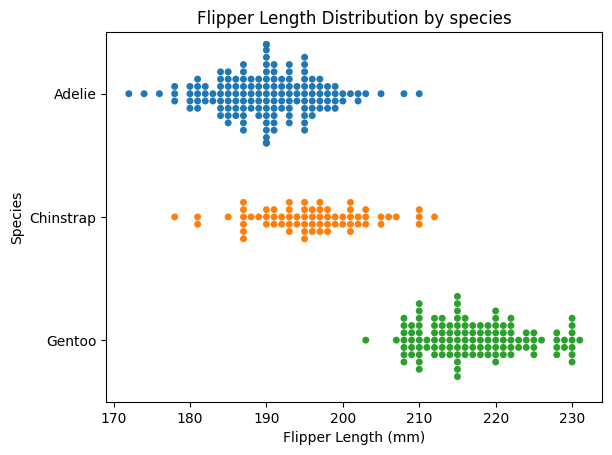

In [25]:
# sns.swarmplot(x=disney_df['ratings'])
# plt.show()

sns.swarmplot(x='Flipper Length (mm)',y='Species', hue='Species', data=penguin_df)
plt.yticks(ticks=[0, 1, 2], labels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title('Flipper Length Distribution by species')
plt.show()

#### Distribution Plots
These plots show the distribution of a single variable.
- histplot (aka histogram): *sns.histplot()*
- kdeplot (Kernel Density Estimate plot): *sns.kdeplot()* 
- ecdfplot (Empirical Cumulative Distribution Function): *sns.ecdfplot()*

displot: A figure-level function for creating histograms and KDE plots.

In [26]:
disney_df.head(2)

,Title,Year,Age,Rotten Tomatoes,Disney+,Type,ratings
270,White Fang,2018,7+,76/100,1,0,76
712,Muppets Most Wanted,2014,7+,67/100,1,0,67


In [27]:
penguin_df.head(2)
# penguin_df['Island'].unique()

,studyName,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454


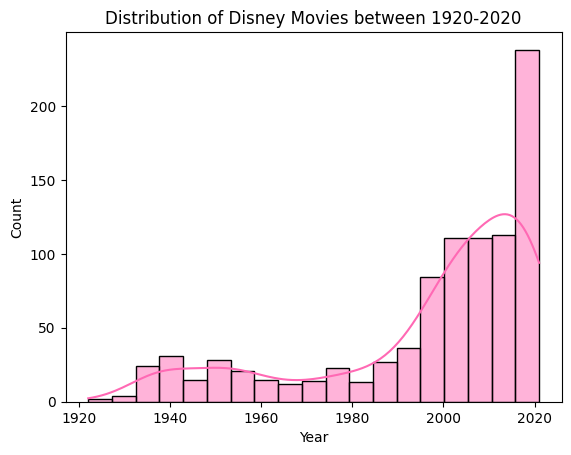

In [28]:
sns.histplot(disney_df, x='Year', 
             kde=True, 
             color='hotpink')
plt.title('Distribution of Disney Movies between 1920-2020')
plt.show()

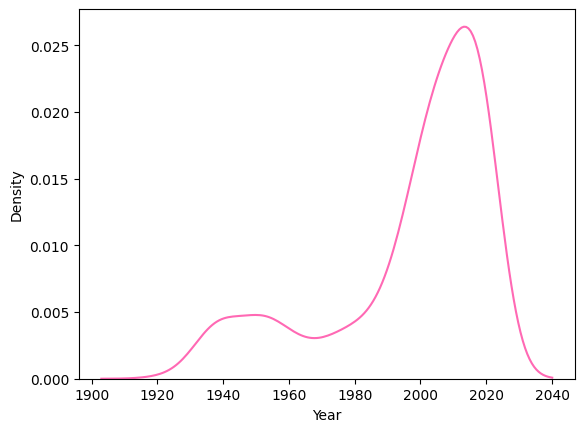

In [29]:
sns.kdeplot(disney_df, x='Year', color='hotpink')
plt.show()

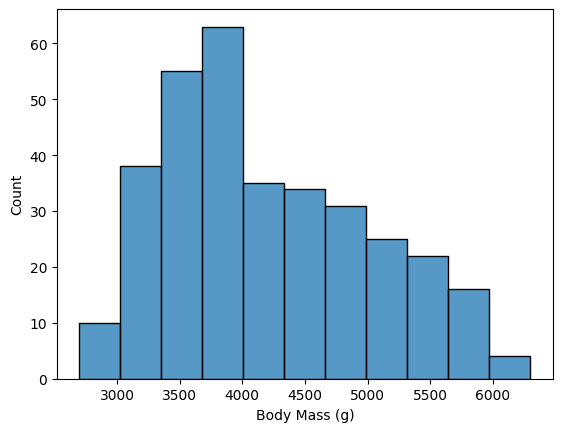

In [30]:
sns.histplot(data=penguin_df, x='Body Mass (g)')
plt.show()

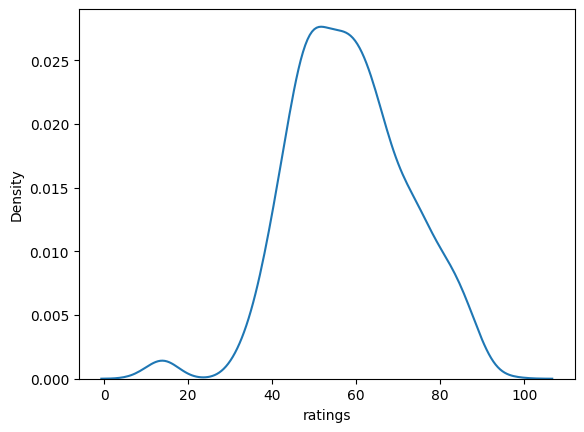

In [31]:
sns.kdeplot(x=disney_df['ratings']) #'Year'
plt.show()

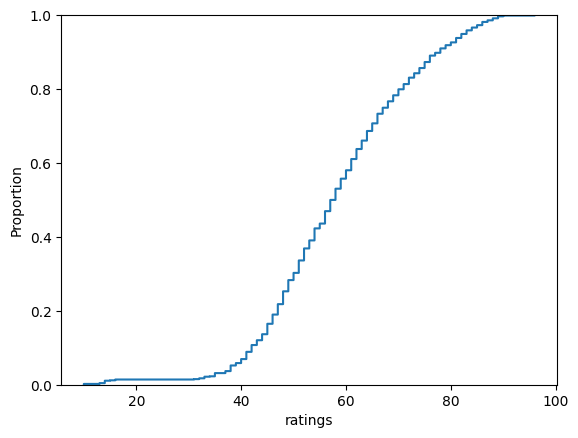

In [32]:
sns.ecdfplot(x=disney_df['ratings'])
plt.show()

#### Matrix Plots
These plots are used to visualize data in matrix form.
- heatmap: *sns.heatmap()*
- clustermap (hierarchically-clustered heatmap): *sns.clustermap()*

In [48]:
adelie_matrix = penguin_df[penguin_df['Species']=='Adelie Penguin (Pygoscelis adeliae)']
adelie_matrix = adelie_matrix.drop(columns=['Species','studyName', 'Region', 'Island', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])

In [49]:
adelie_matrix.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


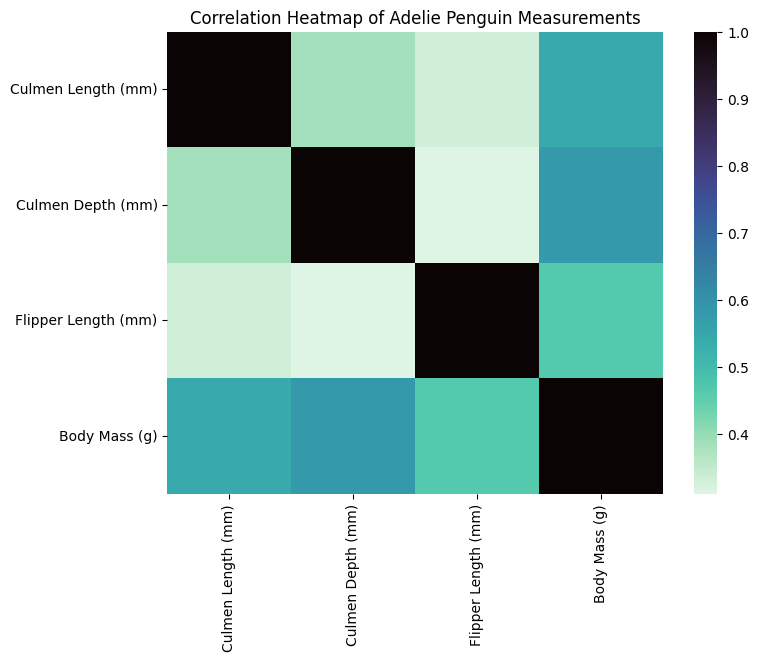

In [50]:
# sns.heatmap(df)
plt.figure(figsize=(8, 6))
sns.heatmap(adelie_matrix.corr(), cmap='mako_r')
plt.title('Correlation Heatmap of Adelie Penguin Measurements')
plt.show()

#### Multi-Plot Grids
These are used for plotting multiple plots in a grid layout.
- FacetGrid: *sns.FacetGrid()*
- PairGrid: *sns.PairGrid()*
- pairplot: *sns.pairplot()*

In [51]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


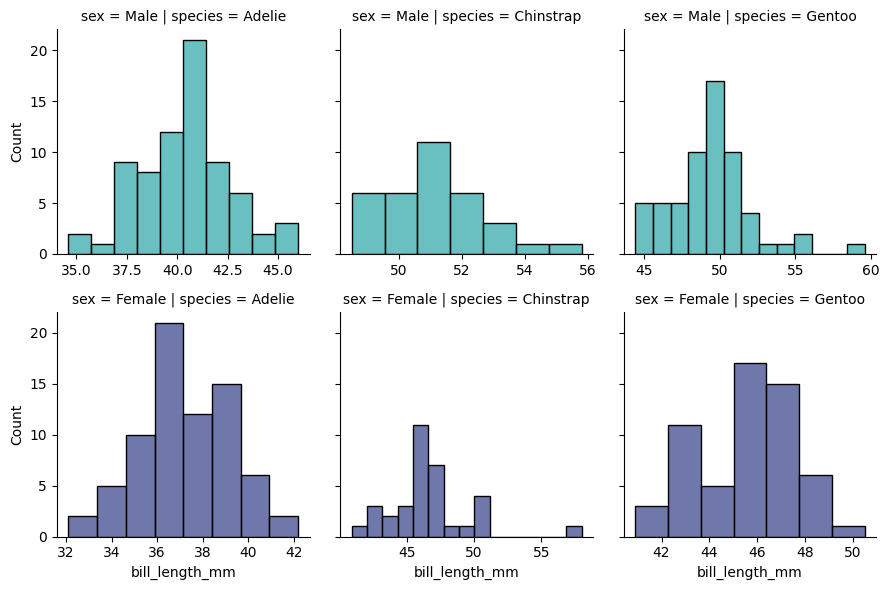

In [52]:
peng = sns.FacetGrid(penguins, col='species', #creates separate columns for each unique value in the Species column
                     row='sex', hue='sex', palette="mako_r", sharex=False)
peng.map(sns.histplot, 'bill_length_mm')
# plt.xticks(ticks=[0, 1, 2], labels=['Adelie', 'Chinstrap', 'Gentoo'])

plt.show()

In [53]:
penguin_df.head(2)

,studyName,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454


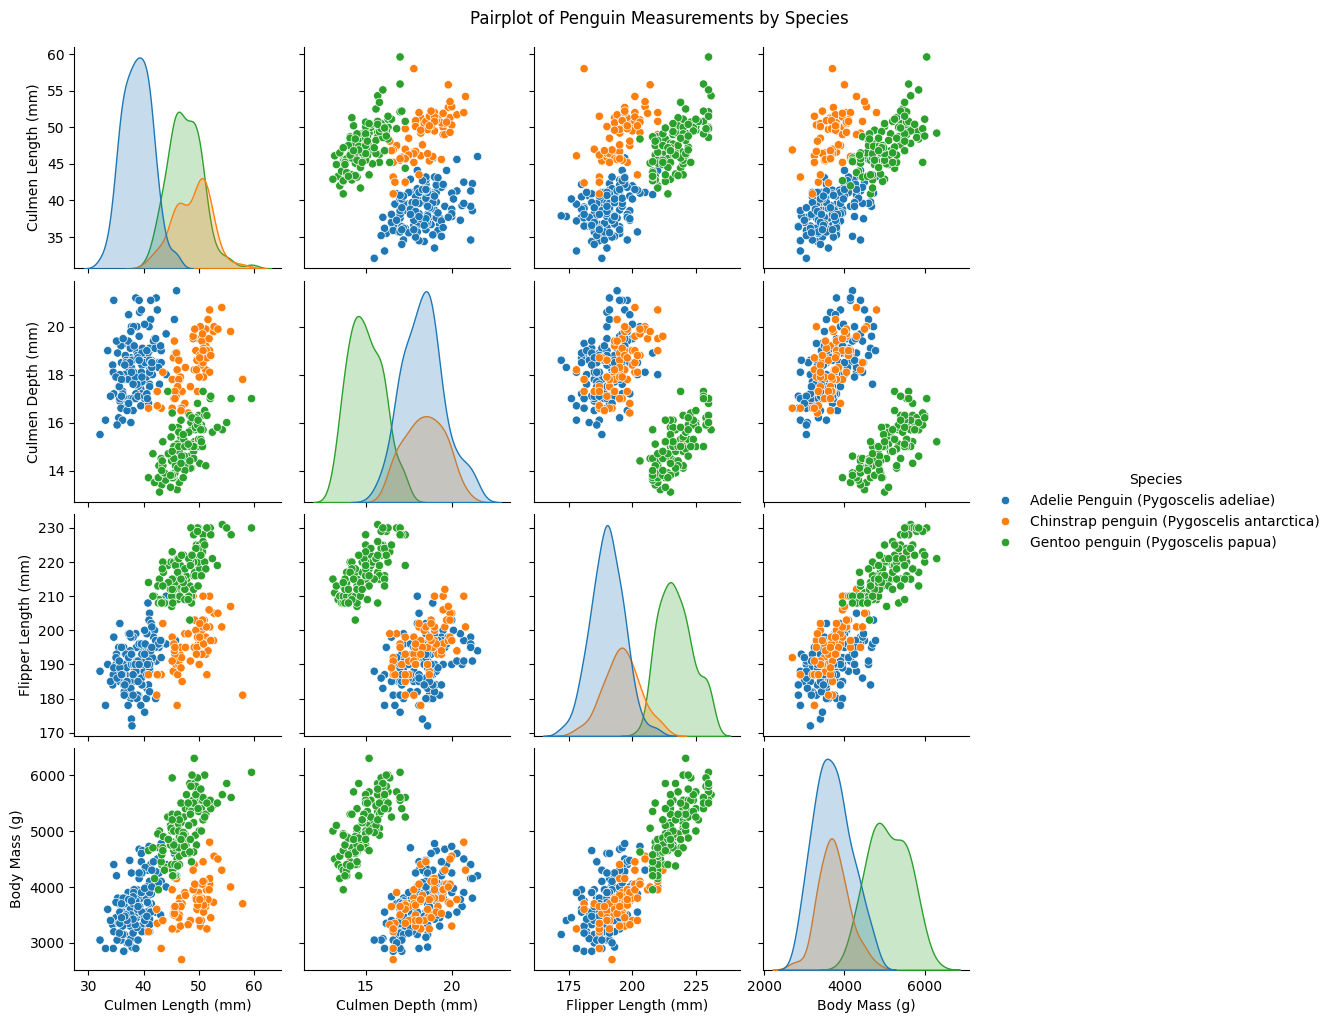

In [54]:
sns.pairplot(x_vars = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'],
             y_vars = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'],
             hue = 'Species',
             data = penguin_df)
plt.suptitle('Pairplot of Penguin Measurements by Species', y=1.02)
plt.show()

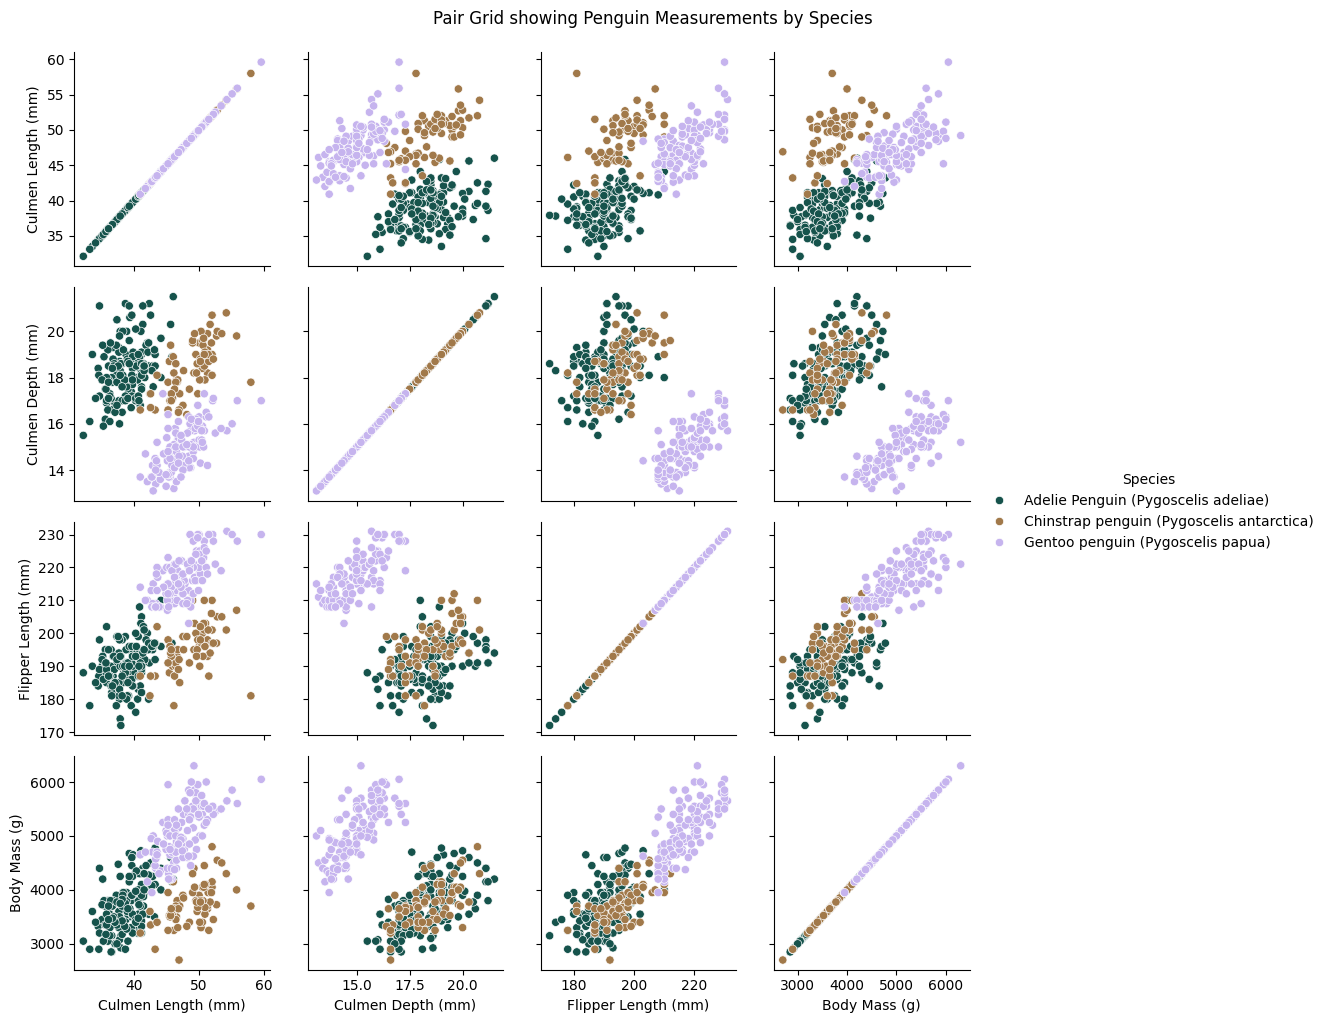

In [55]:
# sns.PairGrid()
pg = sns.PairGrid(penguin_df,
                 x_vars = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'],
                 y_vars = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'],
                 hue='Species',
                 palette='cubehelix')
pg.map(sns.scatterplot)
pg.add_legend()
plt.suptitle('Pair Grid showing Penguin Measurements by Species', y=1.02)

plt.show()

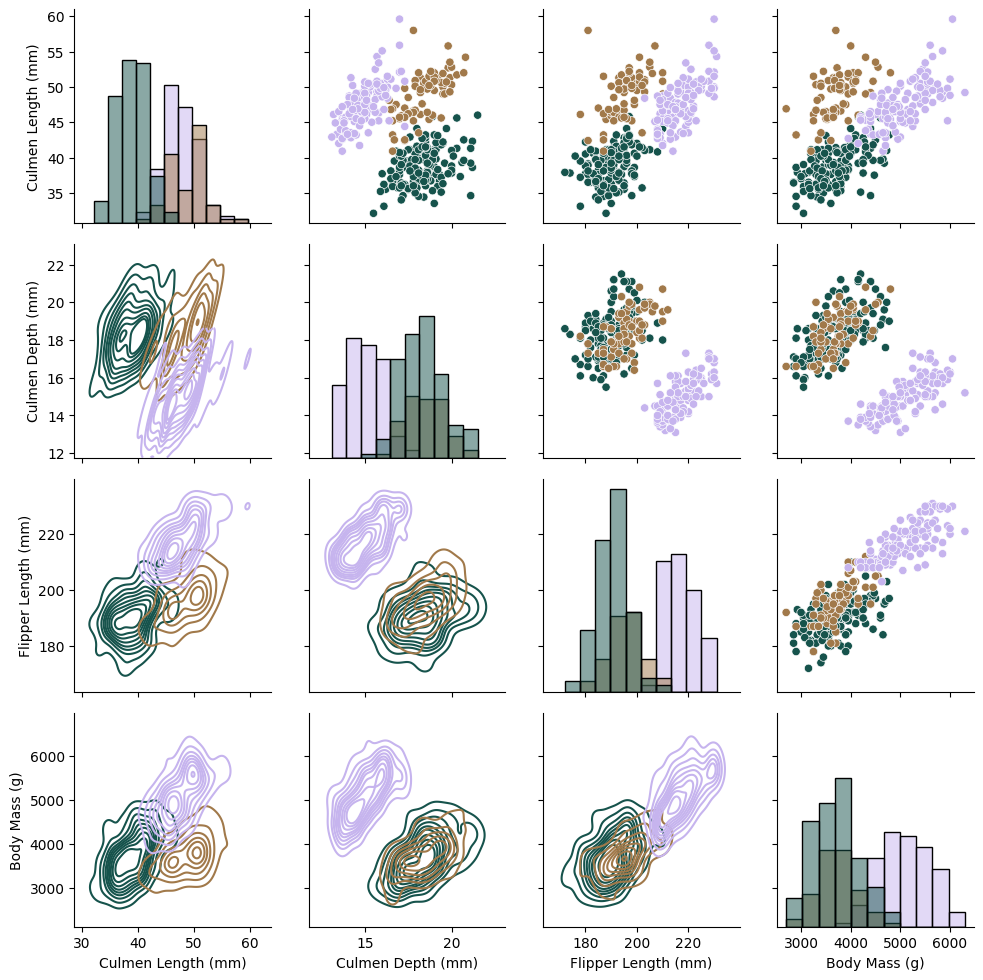

In [56]:
pg2 = sns.PairGrid(penguin_df,
                 x_vars = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'],
                 y_vars = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'],
                 hue='Species',
                 palette='cubehelix')
pg2.map_upper(sns.scatterplot)
pg2.map_lower(sns.kdeplot)
pg2.map_diag(sns.histplot)
# pg.add_legend()
# plt.suptitle('Pair Grid showing Penguin Measurements by Species', y=1.02)

plt.show()

#### Joint Plots
These combine univariate and bivariate plots to show relationships between two variables.
- jointplot: *sns.jointplot()*
- JointGrid: *sns.JointGrid()*

In [57]:
iris = sns.load_dataset('iris')

In [58]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
36,5.5,3.5,1.3,0.2,setosa
46,5.1,3.8,1.6,0.2,setosa
52,6.9,3.1,4.9,1.5,versicolor
140,6.7,3.1,5.6,2.4,virginica
106,4.9,2.5,4.5,1.7,virginica


In [59]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


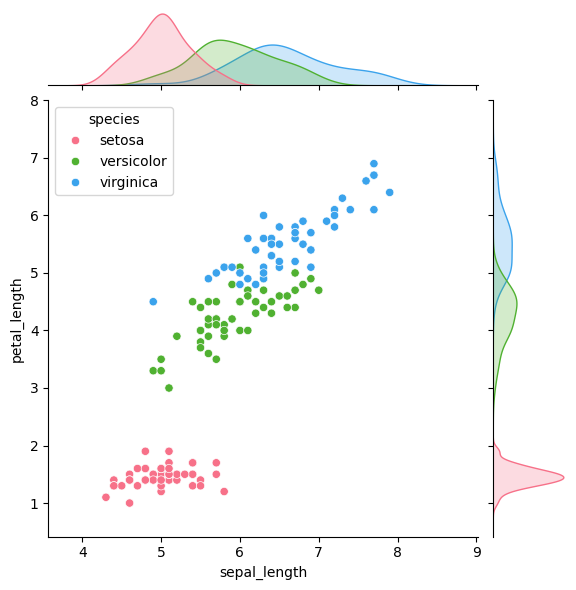

In [60]:
# sns.jointplot()

ir = sns.jointplot(data=iris, x="sepal_length", y="petal_length", 
              hue='species', 
              palette='husl')
plt.show()

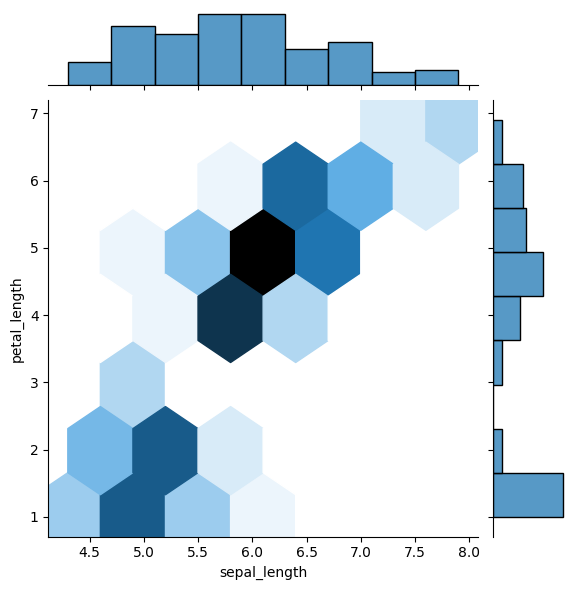

In [61]:
# sns.jointplot()

ir = sns.jointplot(data=iris, x="sepal_length", y="petal_length", kind='hex')
plt.show()

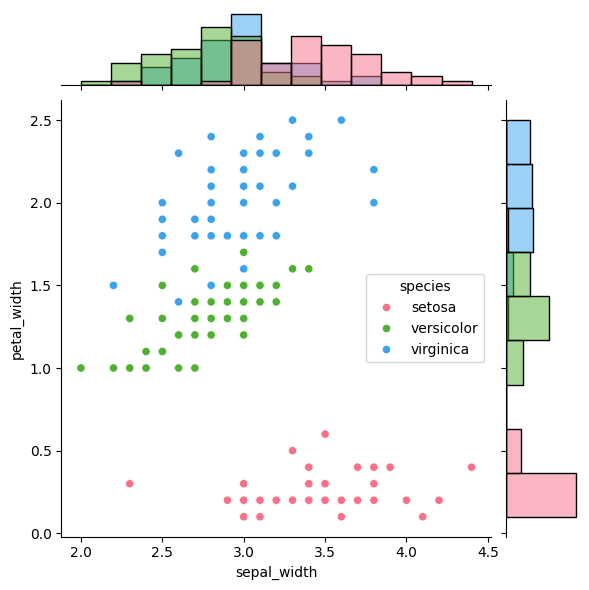

In [62]:
# sns.JointGrid()

ir2 = sns.JointGrid(data=iris, x="sepal_width", y="petal_width",
              hue='species', 
              palette='husl')

ir2.plot(sns.scatterplot, sns.histplot)
plt.show()

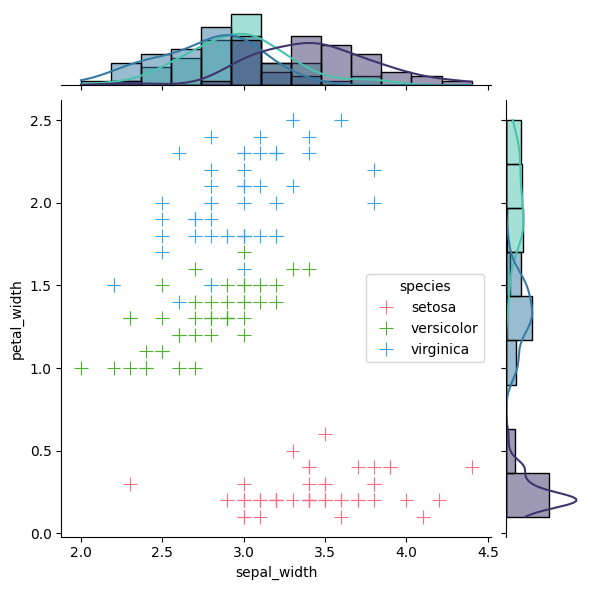

In [63]:
# sns.JointGrid()

ir2 = sns.JointGrid(data=iris, x="sepal_width", y="petal_width",
              hue='species')
                   # height=8)

ir2.plot_joint(sns.scatterplot, s=100, palette='husl', marker="+")
ir2.plot_marginals(sns.histplot, kde=True, palette='mako')
plt.show()

#### Time Series Plots
These plots are used to visualise time series data.
- lineplot: *sns.lineplot()* 

In [64]:
disney_df.head(2)

,Title,Year,Age,Rotten Tomatoes,Disney+,Type,ratings
270,White Fang,2018,7+,76/100,1,0,76
712,Muppets Most Wanted,2014,7+,67/100,1,0,67


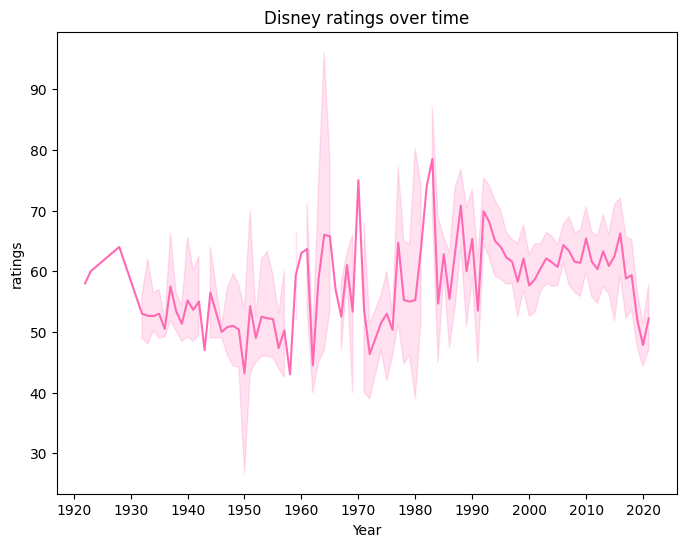

In [65]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', 
                y='ratings', 
                data=disney_df,
                color='hotpink')
plt.title('Disney ratings over time')
plt.xticks(ticks=range(1920, 2024, 10)) 
plt.show()

#### Statistical Estimation
These plots are used to show statistical estimates of the data.
- barplot: *sns.barplot()*
- pointplot: *sns.pointplot()*
- countplot: *sns.countplot()*

In [66]:
plants_df = pd.read_csv('/home/annie/Python/data/plant_growth_data.csv')
plants_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/annie/Python/data/plant_growth_data.csv'

In [67]:
penguin_df.head(2)

,studyName,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454


In [68]:
adelie = penguin_df[penguin_df['Species']=='Adelie Penguin (Pygoscelis adeliae)']
adelie

,studyName,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
...,...,...,...,...,...,...,...,...,...,...,...
147,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,36.6,18.4,184.0,3475.0,FEMALE,8.68744,-25.83060
148,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,36.0,17.8,195.0,3450.0,FEMALE,8.94332,-25.79189
149,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,37.8,18.1,193.0,3750.0,MALE,8.97533,-26.03495
150,PAL0910,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,36.0,17.1,187.0,3700.0,FEMALE,8.93465,-26.07081


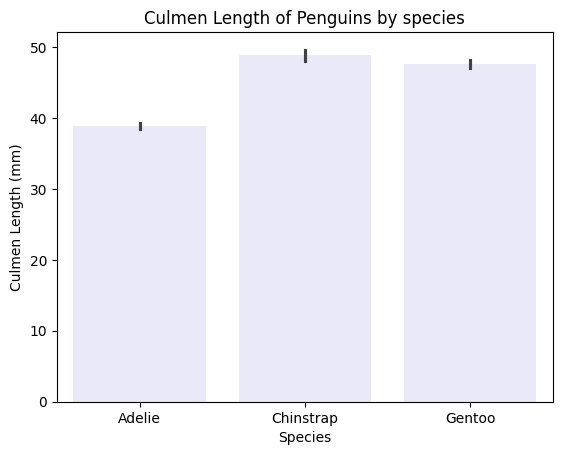

In [69]:
sns.barplot(data=penguin_df, x='Species', y='Culmen Length (mm)', color='lavender')
plt.xticks(ticks=[0, 1, 2], labels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title('Culmen Length of Penguins by species')
plt.show()

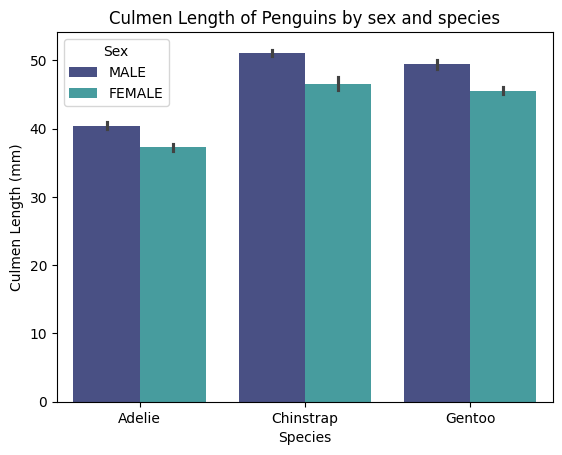

In [70]:
sns.barplot(data=penguin_df, x='Species', y='Culmen Length (mm)', hue='Sex', palette='mako')
plt.xticks(ticks=[0, 1, 2], labels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title('Culmen Length of Penguins by sex and species')
plt.show()

In [71]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


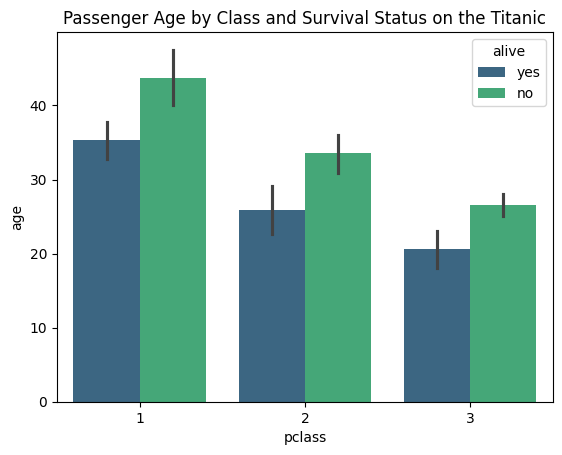

In [72]:
sns.barplot(data=titanic, x='pclass', y='age', palette='viridis', hue='alive')
plt.title('Passenger Age by Class and Survival Status on the Titanic')
plt.show()

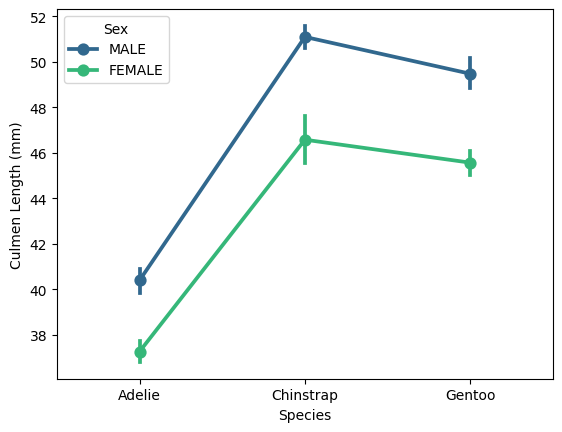

In [73]:
# sns.pointplot()

sns.pointplot(data=penguin_df, x='Species', y='Culmen Length (mm)', hue='Sex', palette='viridis')
plt.xticks(ticks=[0, 1, 2], labels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

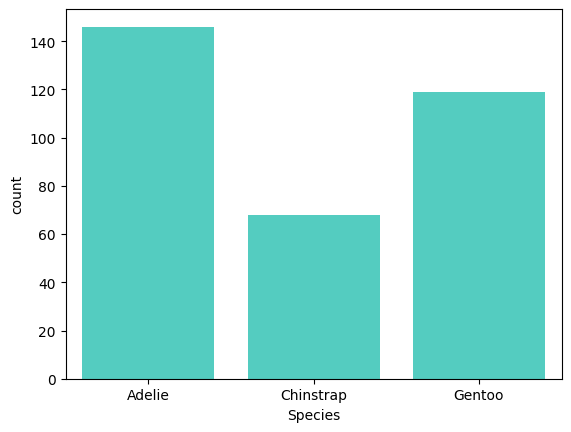

In [74]:
# sns.countplot()
sns.countplot(data=penguin_df, x='Species', color='turquoise')
plt.xticks(ticks=[0, 1, 2], labels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.show()

In [75]:
penguin_df.Species.value_counts()#.sum()

Species
Adelie Penguin (Pygoscelis adeliae)          146
Gentoo penguin (Pygoscelis papua)            119
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [76]:
(152/344)*100

44.18604651162791

In [77]:
(124/344)*100

36.04651162790697

In [78]:
(68/344)*100

19.767441860465116